<a href="https://colab.research.google.com/github/Abhilamani07/PYTHON_ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Passenger Survival Prediction**
# 1. Problem Statement

During the Titanic disaster, passenger survival was influenced by factors such as age, gender, and passenger class.
The objective of this project is to build a binary classification machine learning model to predict whether a passenger survived (Yes/No) using historical passenger data and to identify the most important factors affecting survival.

# 2.Understand passenger survival patterns

* Understand passenger survival patterns
*   Perform basic data preprocessing
*   Conduct minimal but meaningful EDA
*   Build binary classification models
*  Evaluate model performance
* Identify key survival-influencing features




In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
#file upload

from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
# reading the files

df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Filling the missing values
df['Age']=df['Age'].fillna(df['Age'].median())

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
#droping columns

df.drop('Cabin', axis=1, inplace=True)

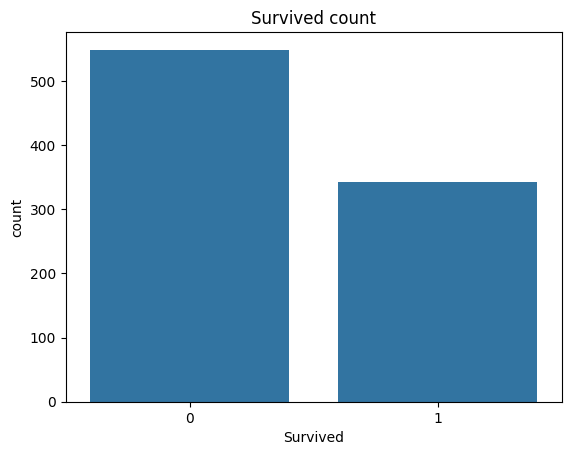

In [ ]:
# step--4  Exploring Data Analysis(EDA)

# Survival count plot

sns.countplot(x='Survived',data=df)
plt.title("Survived count")
plt.show()

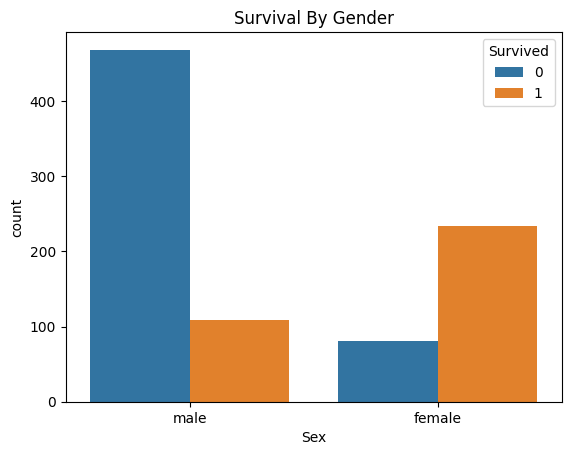

In [ ]:
#Graph Survival by Gender

sns.countplot(x='Sex',hue='Survived', data=df)
plt.title("Survival By Gender")
plt.show()


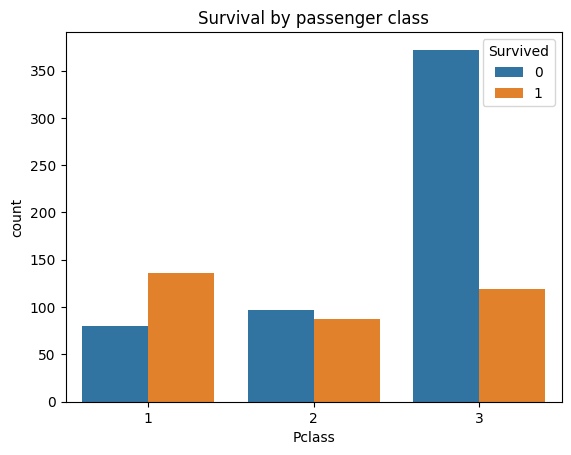

In [ ]:
#Graph Survival by passenger class

sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival by passenger class")
plt.show()

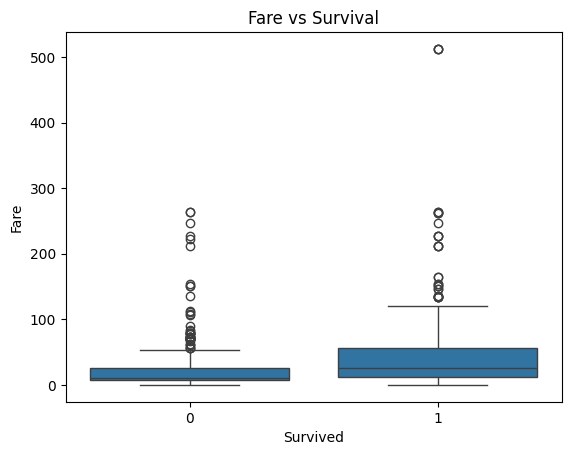

In [ ]:
#Fare vs Survival

sns.boxplot(x='Survived',y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

#5. Machine Learning Workflow
* Load the dataset
* Handle missing values (Age, Embarked)
* Drop columns with high missing values (Cabin)
* Encode categorical variables (Sex, Embarked)
* Scale numerical features (Age, Fare)
* Split data into training and testing sets
* Train binary classification models

In [ ]:
#Data processing

le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [ ]:
#Features and target variable

X=df[['Pclass','Age','Embarked']]
y=df[['Survived']]

In [ ]:
#train test split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.25,random_state=42
)

In [ ]:
#logistic Regression

model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
pred=model.predict([[2,24,2]])
print("prediction :",pred)

prediction : [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Decision Tree

model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred=model.predict(X_test)
print(" prediction:",y_pred)

 prediction: [0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7219730941704036


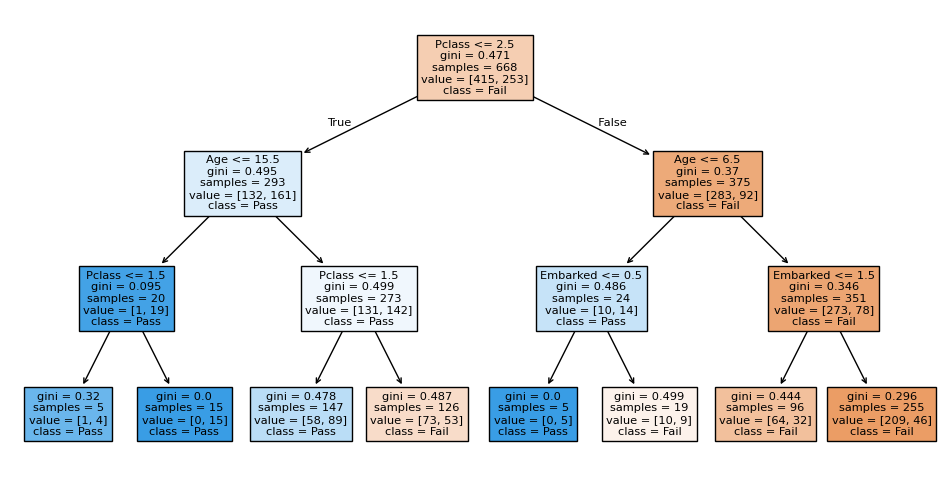

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(
    model,
    feature_names=['Pclass','Age','Embarked'],
    class_names=['Fail','Pass'],
    filled=True
)
plt.show()

In [ ]:
#Random forest

rf=RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print("Prediction:",y_pred)


Prediction: [0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0]


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
#Model Evaluation

def evaluate_model(y_test,y_pred):
  print("Accuracy:",accuracy_score(y_test,y_pred))
  print("Precision:",precision_score(y_test,y_pred))
  print("Recall:",recall_score(y_test,y_pred))
  print("F1_score:",f1_score(y_test,y_pred))
evaluate_model(y_test,y_pred)

Accuracy: 0.6367713004484304
Precision: 0.5645161290322581
Recall: 0.39325842696629215
F1_score: 0.46357615894039733


In [ ]:
#Confusion matrix graph
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

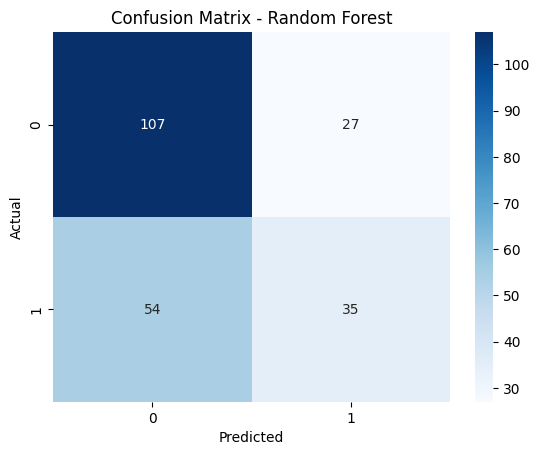

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.80      0.73       134
           1       0.56      0.39      0.46        89

    accuracy                           0.64       223
   macro avg       0.61      0.60      0.59       223
weighted avg       0.62      0.64      0.62       223



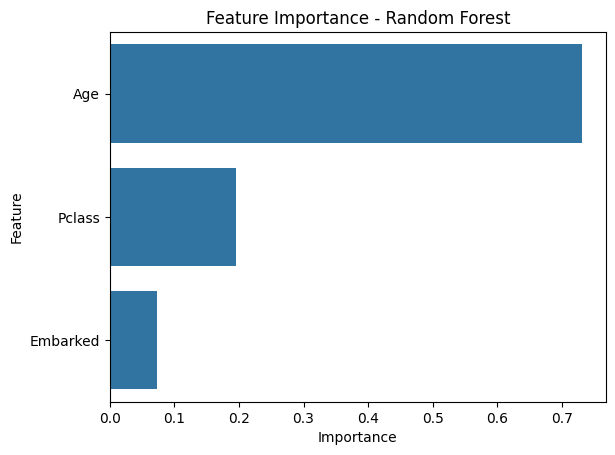

In [ ]:
##classification report


print(classification_report(y_test,y_pred))
# Feature importance
importances = rf.feature_importances_
feature = X.columns

feat_df = pd.DataFrame({
    'Feature': feature,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

sns.barplot(x='Importance',y='Feature',data=feat_df)
plt.title('Feature Importance - Random Forest')
plt.show()